# Spectral Slope Interface Model

Chris Field January 2022

* Create a line of Gaussian noise, and then filter spectral amplitudes according to power-law

In [1]:
import os  # operating system
import sys # to add src directory for my modules
#
import numpy as np
import math
import random
#
import pandas as pd
#
from scipy import stats
from scipy import signal
from scipy.fft import fft, ifft
#
#Other libraries
from pprint import pprint
#
# Plotting requirements
import matplotlib.pyplot as plt
import matplotlib.font_manager # different fonts
from matplotlib import rcParams # runtime config to set fonts

In [2]:
# Using rcParams set the global fonts for Matplotlib
# Global parameters for Matplotlib: set font etc.
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Gill Sans MT']
rcParams['font.serif'] = ['Garamond']
rcParams['font.size'] = '16'
#

# Define Functions

In [3]:
def single_plot(samp_sum_list, D_total=50, title='Samp_sum_list', step = 1):
    """
    Plot a list or array, e.g. final samp_sum_list
    
    samp_sum_list -- running sum along the spatial grid of samples, this is our random interface
    D_total -- maximum depth to plot for the random interface plot
    step -- scale the x-axis (by default we assume steps of 1 metre)
    """
    x_init = np.arange(len(samp_sum_list)) 
    x = x_init * step
    # plot
    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(1,1,1)

    ax.set_title(title)
    
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Depth (m)')
    
    ax.step(x, samp_sum_list, linewidth=2.5, alpha=0.9, color='#d62728')
    ax.set_ylim([0,D_total])
    plt.gca().invert_yaxis()

        # cosmetics
    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ## Remove tick marks.
    # ax.tick_params(bottom=False, left=False)

    ## Add bar lines as a horizontal grid.
    # ax.yaxis.grid(color='white')

    plt.tight_layout()
    
    plt.show()

In [4]:
def psd_plot(topography_array, step=1, title='Periodogram Power Spectral Density versus Wave Number'):
    """
    Takes in an array that is the topographic profile (for example the random interface),
    derives Power Spectral Density,
    does a regression to get the slop
    plots the power spectral density and the regression 
    
    topographic array -- list or ndarray of the depths
    step -- the x-increment step of the array, default =1m
    """
    fs = 1/step
    # Look at the power spectral density
    freqs, psd = signal.periodogram(topography_array, fs=fs)

    # Start plot
    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(1,1,1)

    # log x and y axis
    ax.plot(np.log10(freqs[1:-1]), np.log10(psd[1:-1]), alpha =0.6, color='#1f77b4', solid_capstyle="butt", lw=3)

    ax.set(title=title)
    ax.set_xlabel('Log(k)')
    ax.set_ylabel('Log(Power)')

    # cosmetics
    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()

    # Show and save the graph
    plt.show()

In [5]:
def psd_plot_x_lims(topography_array, step=1, title='Periodogram Power Spectral Density versus Wave Number', xmin=-5, xmax=0, ymin=0, ymax=9):
    """
    Takes in an array that is the topographic profile (for example the random interface),
    derives Power Spectral Density,
    does a regression to get the slop
    plots the power spectral density and the regression 
    
    topographic array -- list or ndarray of the depths
    step -- the x-increment step of the array, default =1m
    """
    fs = 1/step
    # Look at the power spectral density
    freqs, psd = signal.periodogram(topography_array, fs=fs)

    # Start plot
    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(1,1,1)

    # log x and y axis
    ax.plot(np.log10(freqs[1:-1]), np.log10(psd[1:-1]), alpha =0.6, color='#1f77b4', solid_capstyle="butt", lw=3)

    ax.set(title=title)
    ax.set_xlabel('Log(k)')
    ax.set_ylabel('Log(Power)')

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # cosmetics
    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()

    # Show and save the graph
    plt.show()

In [6]:
def psd_and_slope_plot(topography_array, step=1, title='Periodogram Power Spectral Density versus Wave Number', 
                       f_der_strt=1, f_der_fin=-2000, label_slope=True):
    """
    Takes in an array that is the topographic profile (for example the random interface),
    derives Power Spectral Density,
    does a regression to get the slop
    plots the power spectral density and the regression 
    
    topographic array -- list or ndarray of the depths
    step -- the x-increment step of the array, default =1m
    """
    fs = 1/step
    # Look at the power spectral density
    freqs, psd = signal.periodogram(topography_array, fs=fs)

    # Do a regression and work out the slope
    res = stats.linregress(np.log10(freqs[f_der_strt:f_der_fin]), np.log10(psd[f_der_strt:f_der_fin]))
    print(res)
    print(f'The slope is {round(res.slope,2)}')

    # Start plot
    fig = plt.figure(figsize=(14,7)) 
    ax = fig.add_subplot(1,1,1)

    # log x and y axis
    ax.plot(np.log10(freqs[1:-1]), np.log10(psd[1:-1]), alpha =0.6, color='#1f77b4', solid_capstyle="butt", lw=3)
    
    label = 'Slope = ' + str(round(res.slope,2))
    ax.plot(np.log10(freqs[f_der_strt:f_der_fin]), res.intercept + res.slope*np.log10(freqs[f_der_strt:f_der_fin]),  alpha=0.95, color='grey', 
            linewidth=3)

    if label_slope:
        ax.text(-1, 4 , label, color='grey')

    ax.set(title=title)
    ax.set_xlabel('Log(k)')
    ax.set_ylabel('Log(Power)')

    # cosmetics
    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()

    # Show and save the graph
    plt.show()

In [7]:
def return_psd(topography_array, step=1, f_der_strt=1, f_der_fin=-2000):
    """
    Takes in an array that is the topographic profile (for example the random interface),
    derives Power Spectral Density,
    does a regression to get the slope and returns the slope
    plots the power spectral density and the regression 
    """
    fs = 1/step
    # Look at the power spectral density
    freqs, psd = signal.periodogram(topography_array, fs=fs)

    # Do a regression and work out the slope
    res = stats.linregress(np.log10(freqs[f_der_strt:f_der_fin]), np.log10(psd[f_der_strt:f_der_fin]))
    slope = res.slope

    return slope

## Input and Output

In [8]:
location_out='./Output/'
location_in = location_out

# If necessary make output folders
if not os.path.exists(location_out) :
    os.makedirs(location_out)

## Generate a line of Gaussian noise

In [9]:
# Mean depth
D_mean = 3000
# Variation in depth
D_std = 1
# These are roughly based on the Tibr line

In [10]:
random_depths = np.random.normal(D_mean, D_std, 10000)

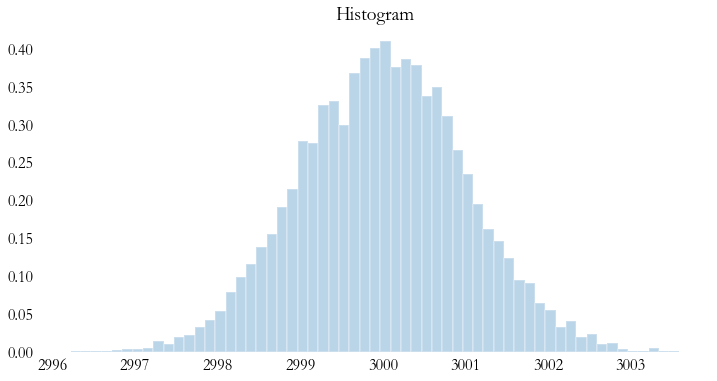

In [11]:
####### Plotiing histogram #########
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(random_depths, density=True, bins='auto', alpha=0.3, edgecolor='white', linewidth=1.5)

ax.set_title(f'Histogram')
# cosmetics
## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

## Remove tick marks.
ax.tick_params(bottom=False, left=False)

plt.show()

## Fourier Transform

In [12]:
random_depths

array([2998.26823191, 2999.88297755, 2998.74375818, ..., 3000.1894118 ,
       2999.65729056, 3000.25613593])

In [13]:
random_fft = fft(random_depths)
random_fft

array([ 3.00000276e+07 -0.j        , -9.02109602e+01+32.79060756j,
       -4.88159882e+01+27.86803119j, ..., -1.15032975e+02 -8.87749189j,
       -4.88159882e+01-27.86803119j, -9.02109602e+01-32.79060756j])

Check the loop (fft back)

In [14]:
random_inv = ifft(random_fft)
np.real(random_inv)

array([2998.26823191, 2999.88297755, 2998.74375818, ..., 3000.1894118 ,
       2999.65729056, 3000.25613593])

Okay let's apply a spectral slope

In [15]:
beta = 1.89
print(f'Using a beta value of {beta}.')

Using a beta value of 1.89.


In [16]:
exponent = -0.5 * beta
length = len(list(random_inv))
print(f'The array length is {length}.')
H_list = []
for i in range(length):
    if i == 0:
        H_list.append(((0.01)/(length)) ** exponent)    
    else:
        H_list.append(((i)/(length)) ** exponent)

The array length is 10000.


In [17]:
H = np.array(H_list)

In [18]:
scaled_fft = np.multiply(random_fft, H)

In [19]:
scaled_fft

array([ 1.40320672e+13+0.00000000e+00j, -5.43574788e+05+1.97582949e+05j,
       -1.52787822e+05+8.72233860e+04j, ...,
       -1.15065597e+02-8.88000939e+00j, -4.88252162e+01-2.78732993e+01j,
       -9.02194860e+01-3.27937066e+01j])

In [20]:
scaled_inv = ifft(scaled_fft)
scaled_random = np.real(scaled_inv)

In [21]:
scaled_inv

array([1.40320660e+09+13.30219628j, 1.40320660e+09+11.02450687j,
       1.40320660e+09 +9.26164038j, ..., 1.40320661e+09+15.37859038j,
       1.40320660e+09+15.21338793j, 1.40320660e+09+15.09829889j])

In [22]:
scaled_random

array([1.40320660e+09, 1.40320660e+09, 1.40320660e+09, ...,
       1.40320661e+09, 1.40320660e+09, 1.40320660e+09])

In [23]:
norm_scaled_random = D_mean - np.mean(scaled_random) + scaled_random

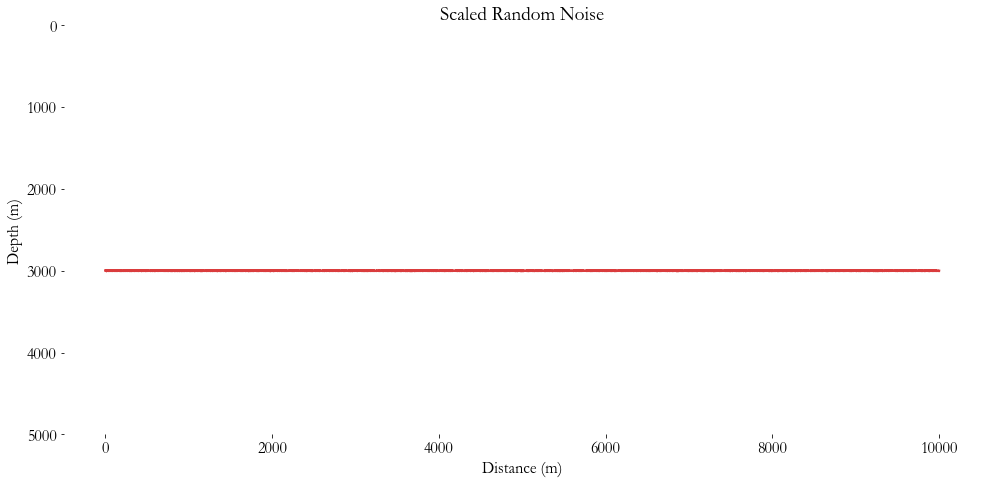

In [24]:
single_plot(random_depths, D_total=5000, title='Scaled Random Noise', step = 1)

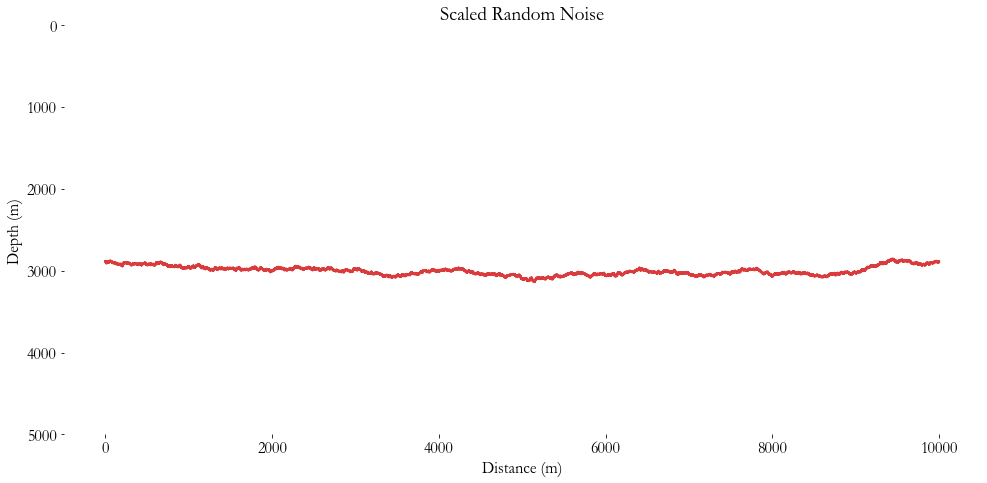

In [25]:
single_plot(norm_scaled_random, D_total=5000, title='Scaled Random Noise', step = 1)

LinregressResult(slope=-0.04026350440328752, intercept=0.02512774171059247, rvalue=-0.03069822188056024, pvalue=0.16996031135665426, stderr=0.02932890691523875)
The slope is -0.04


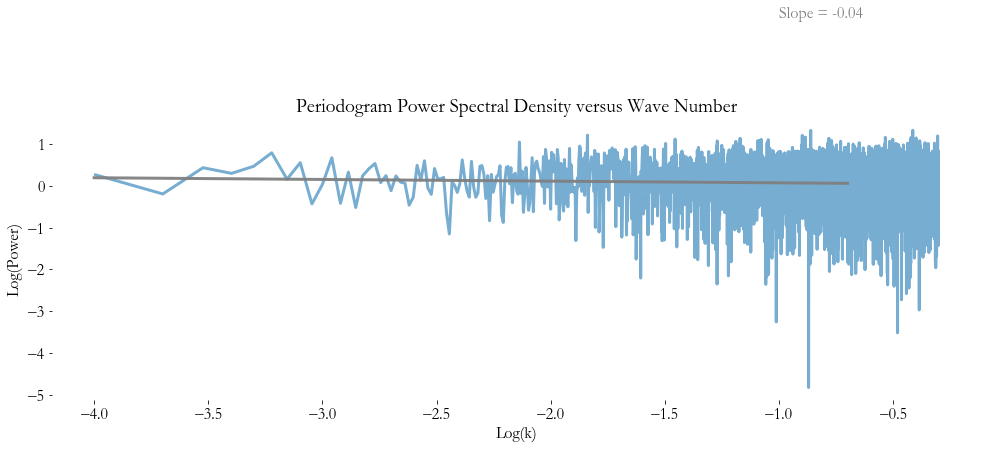

In [26]:
psd_and_slope_plot(random_depths, f_der_strt=1, f_der_fin=-3000)

LinregressResult(slope=-1.8462439990991735, intercept=-0.39682428647244006, rvalue=-0.8127071932356057, pvalue=0.0, stderr=0.03419979197655583)
The slope is -1.85


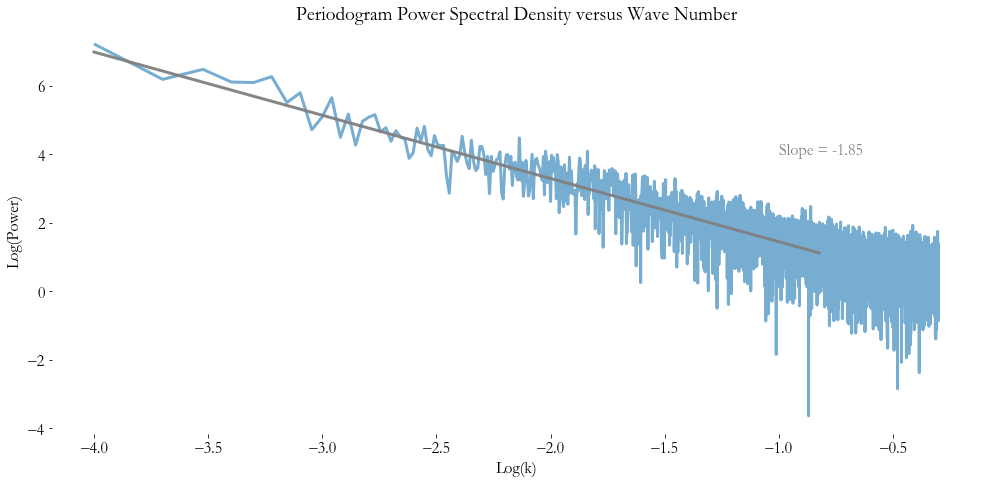

In [27]:
psd_and_slope_plot(norm_scaled_random, f_der_strt=1, f_der_fin=-3500)

Round the interface to the nearest integer values of depth

In [28]:
rnd_norm_scaled_random = np.rint(norm_scaled_random)

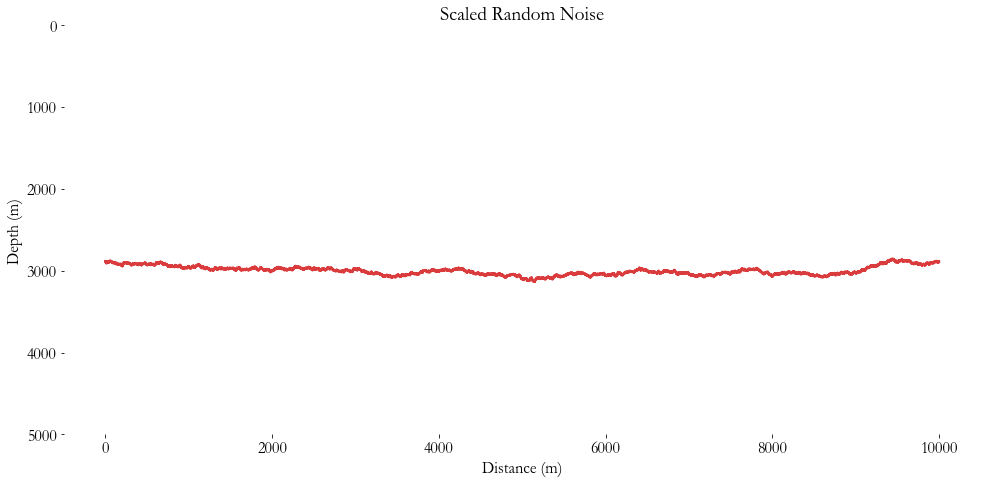

In [29]:
single_plot(rnd_norm_scaled_random, D_total=5000, title='Scaled Random Noise', step = 1)

LinregressResult(slope=-1.8409135207256488, intercept=-0.3876839242482619, rvalue=-0.8139359361867778, pvalue=0.0, stderr=0.03394919499388957)
The slope is -1.84


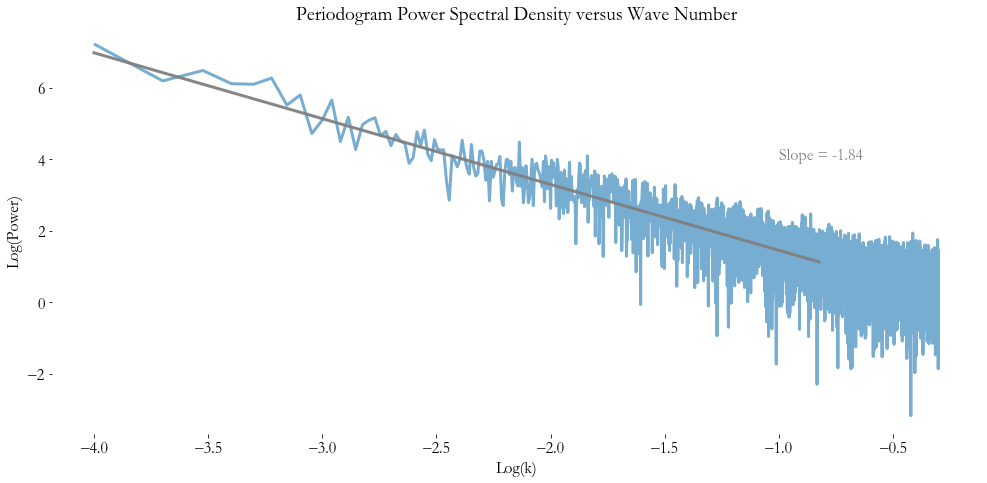

In [30]:
psd_and_slope_plot(rnd_norm_scaled_random, f_der_strt=1, f_der_fin=-3500)

and export it

In [31]:
np.savetxt(location_out+'Spectral_slope_interface_1p89.txt', rnd_norm_scaled_random)

Check

In [32]:
loaded = np.loadtxt(location_out+'Spectral_slope_interface_1p89.txt')

In [33]:
np.array_equal(rnd_norm_scaled_random, loaded)

True